### Analyze the music21 Bach chorale's repository

In [1]:
%load_ext autoreload
%autoreload 2

from music21 import corpus
from tqdm import tqdm
import utils as u
import pandas as pd
import os
import music21




In [2]:
MIDI_PATH = './data/midi'

In [3]:
chorales_iterator = corpus.chorales.Iterator()
results = list()
for i in tqdm(chorales_iterator):
    i =  i.parts[0]
    results.append(u.analyze_stream(i))

results_chorales_df = pd.json_normalize(results)
results_chorales_df['label'] = 'chorale'

100%|██████████| 371/371 [00:33<00:00, 11.16it/s]


In [4]:
results_chants_df = pd.DataFrame()
results = list()
for root, dirs, files in os.walk(MIDI_PATH):
    for file in files:
        if file.endswith('.MID'):
            midi_file = os.path.join(root, file)
            midi_stream = music21.converter.parse(midi_file)
            if len(midi_stream.parts) > 1:
                continue
            i = midi_stream.parts[0]
            results.append(u.analyze_stream(i))
results_chants_df = pd.json_normalize(results)

results_chants_df['label'] = 'chant'
results_df = pd.concat([results_chorales_df, results_chants_df], ignore_index=True)


In [5]:
display(results_df)

,mean_interval,unique_notes_per_bar,accidentals,syncopations,unique_durations,notes_per_bar,time_signature,label
0,2.044444,1.952381,21.0,0.190476,2.000000,2.190476,NaN,chorale
1,2.192308,3.153846,13.0,0.153846,1.538462,4.076923,NaN,chorale
2,1.869565,4.000000,10.0,0.300000,1.700000,4.700000,NaN,chorale
3,1.976190,3.300000,10.0,0.200000,1.300000,4.300000,NaN,chorale
4,1.857143,3.764706,17.0,0.294118,1.705882,4.588235,NaN,chorale
...,...,...,...,...,...,...,...,...
374,1.575758,2.888889,9.0,0.777778,2.666667,3.777778,None,chant
375,3.130435,1.777778,9.0,0.222222,1.777778,2.666667,None,chant
376,2.333333,3.250000,4.0,0.500000,2.500000,4.750000,None,chant
377,2.066667,2.750000,4.0,0.500000,2.500000,4.000000,None,chant


/tmp/ipykernel_7281/579026178.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=12)


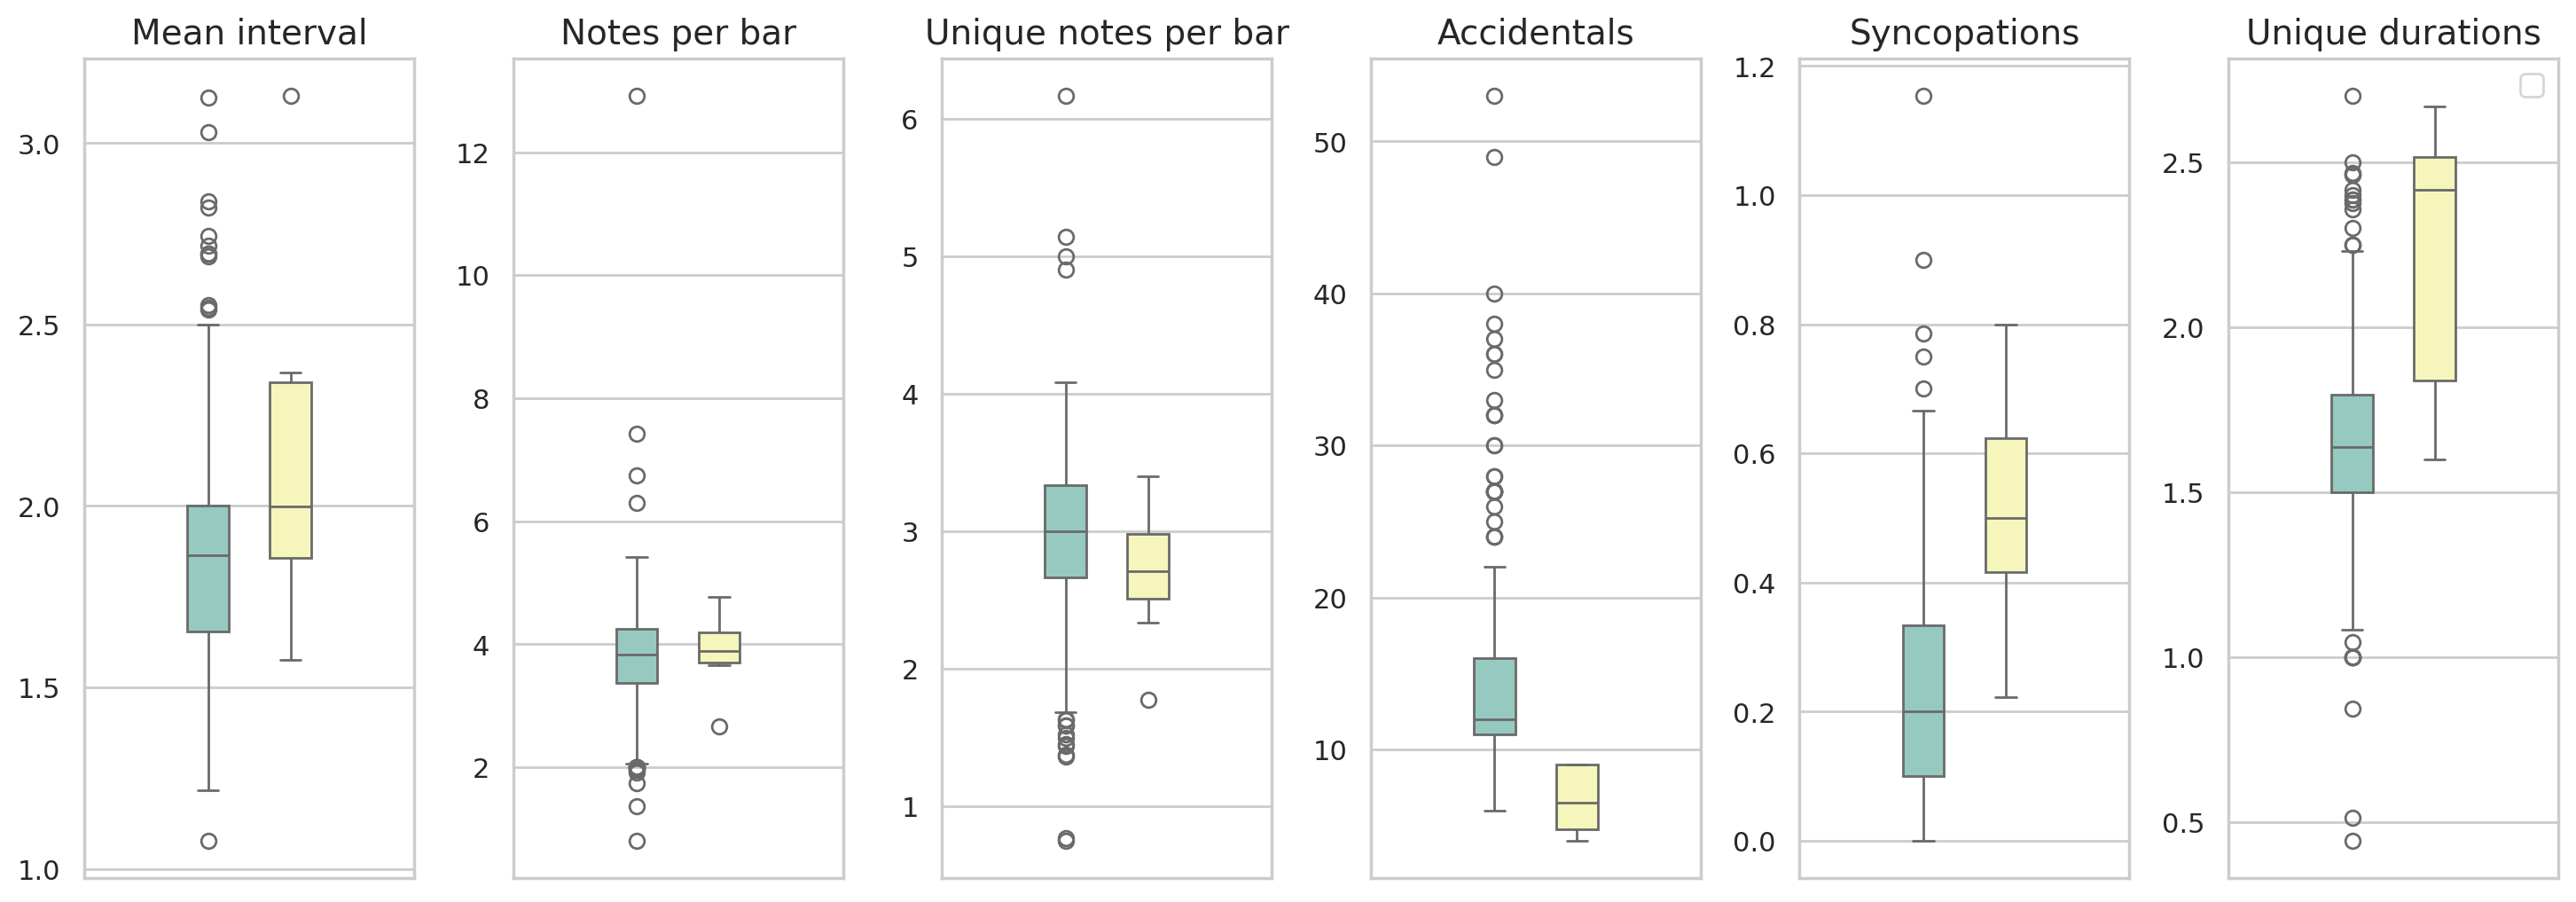

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 6, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)

legend_labels = ['Chorale', 'Chant']

metrics = ['mean_interval', 'notes_per_bar', 'unique_notes_per_bar', 
          'accidentals', 'syncopations', 'unique_durations']

for ax, metric in zip(axes, metrics):
    sns.boxplot(data=results_df, y=metric, hue="label", ax=ax, gap=0.5, width=0.5, legend=False, palette="Set3")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(metric.replace('_', ' ').capitalize(), fontsize=14)
    if metric=='unique_durations':
        ax.legend(loc='upper right', fontsize=12, labels=legend_labels)

plt.show()


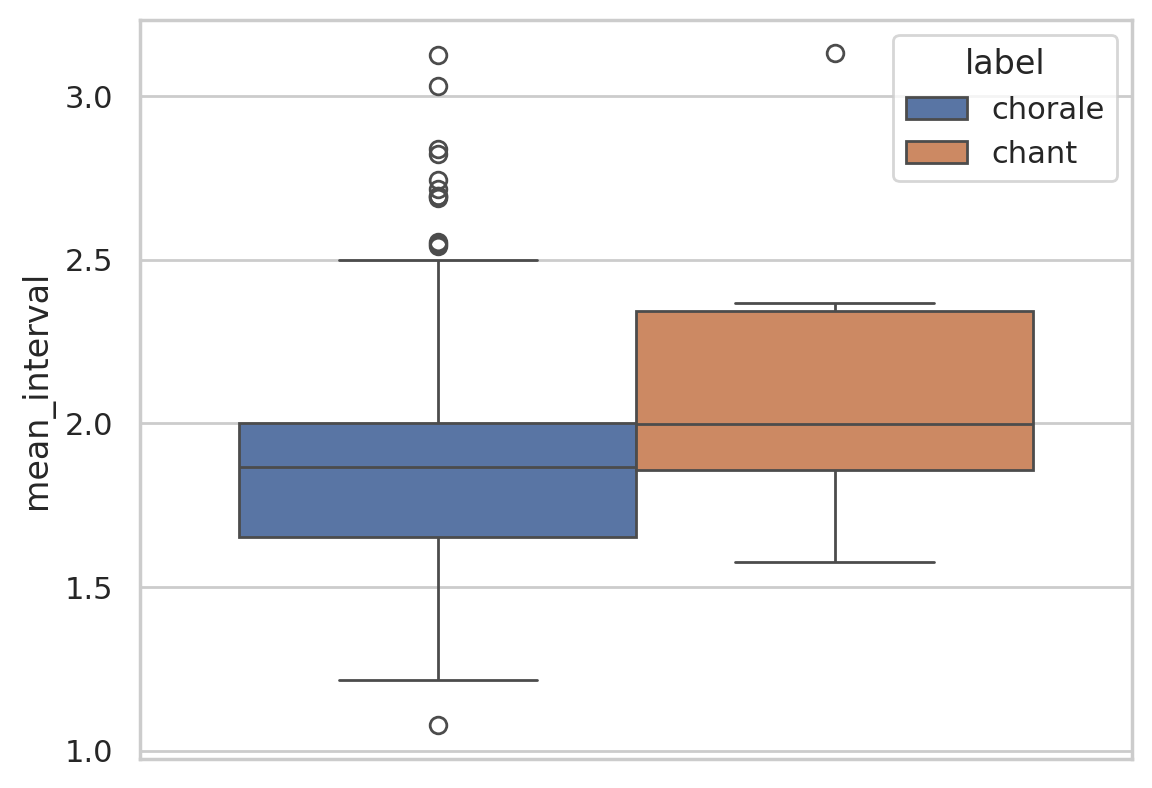

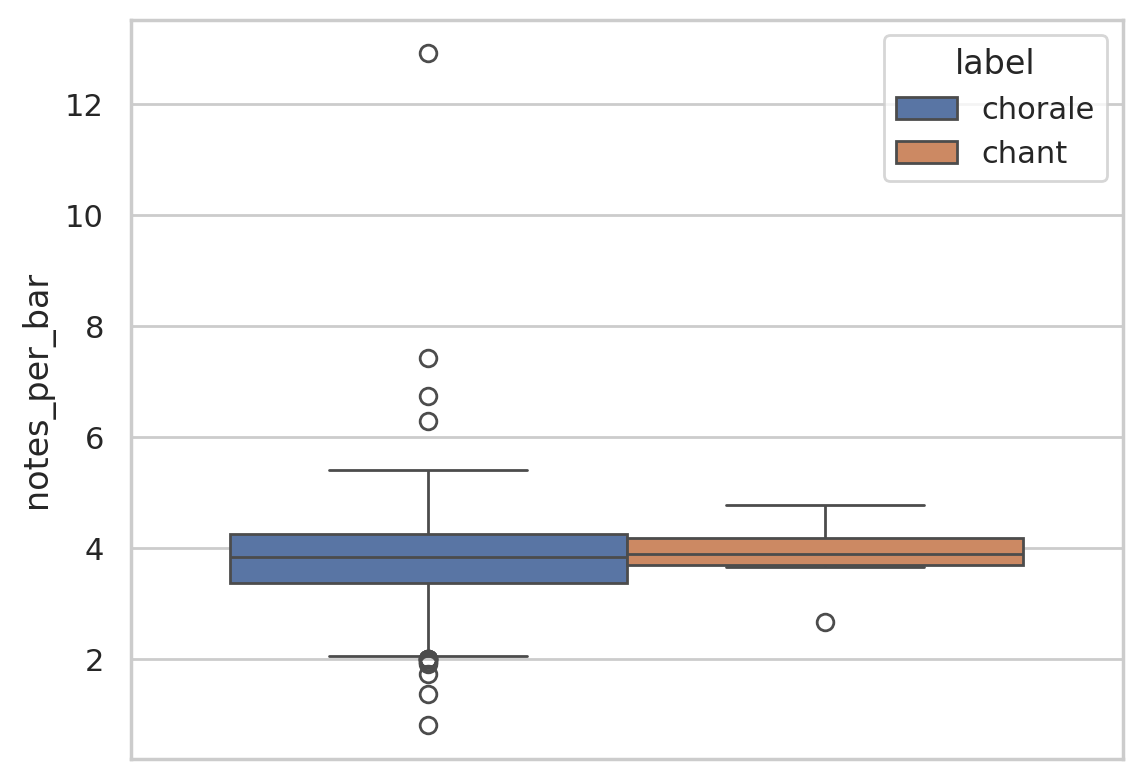

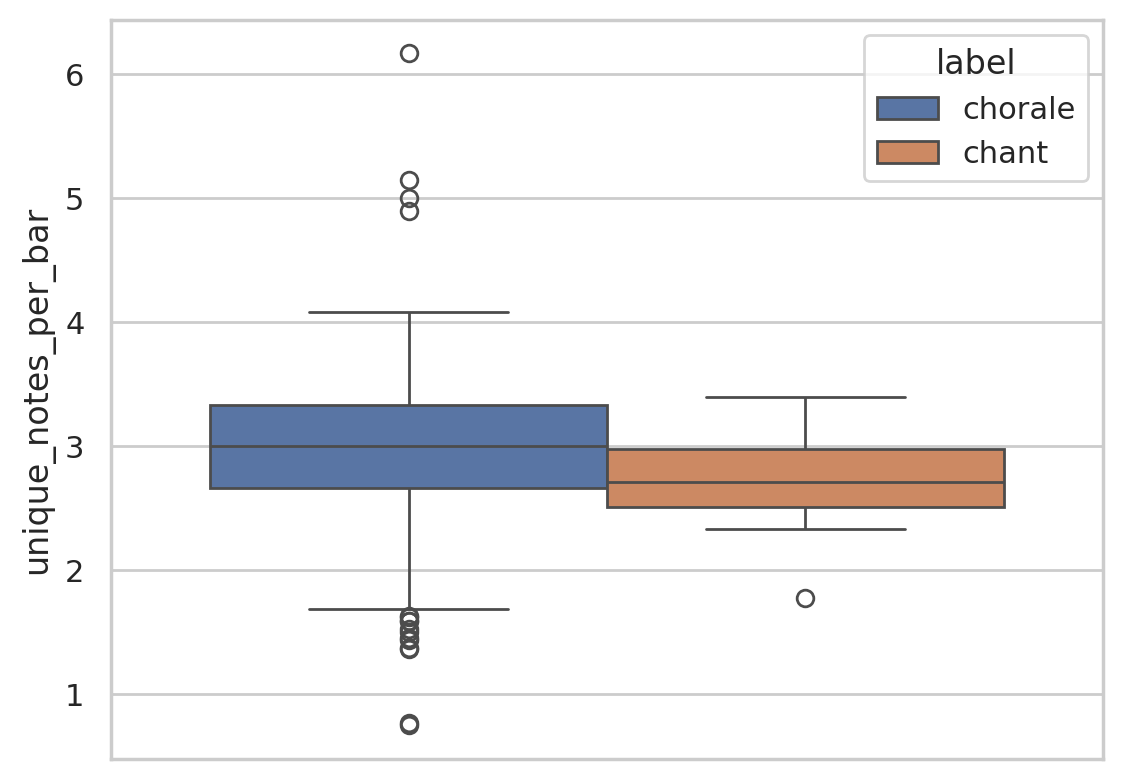

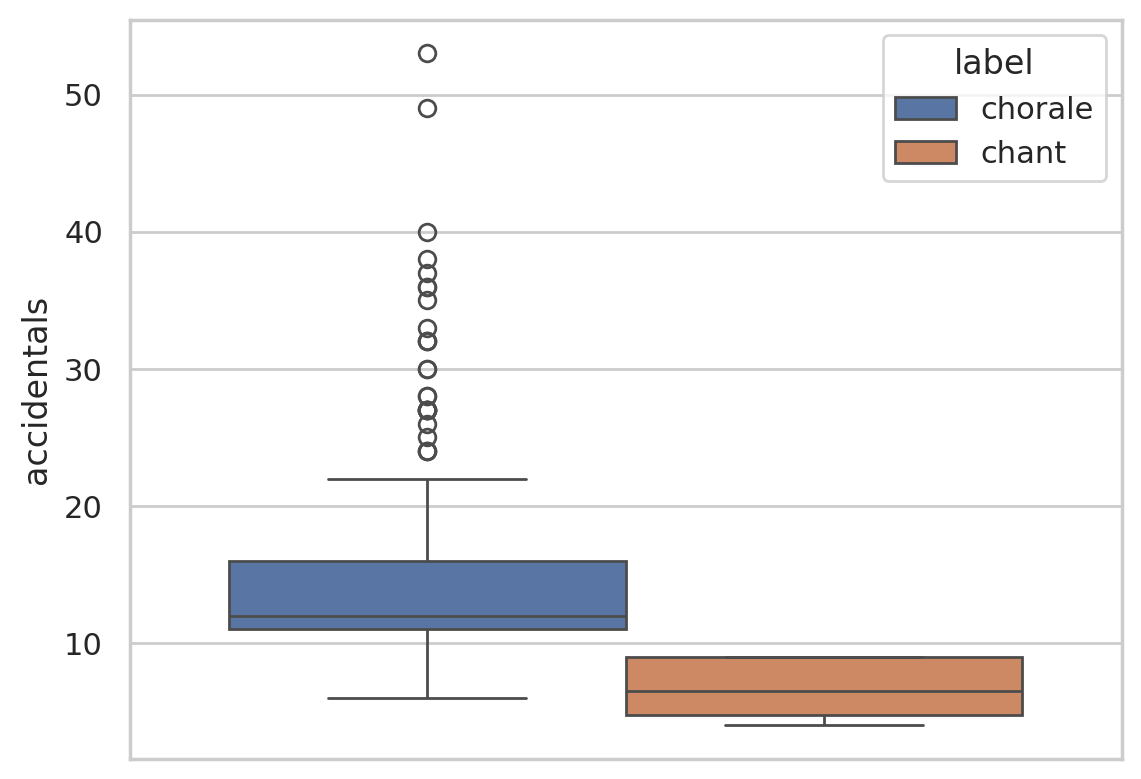

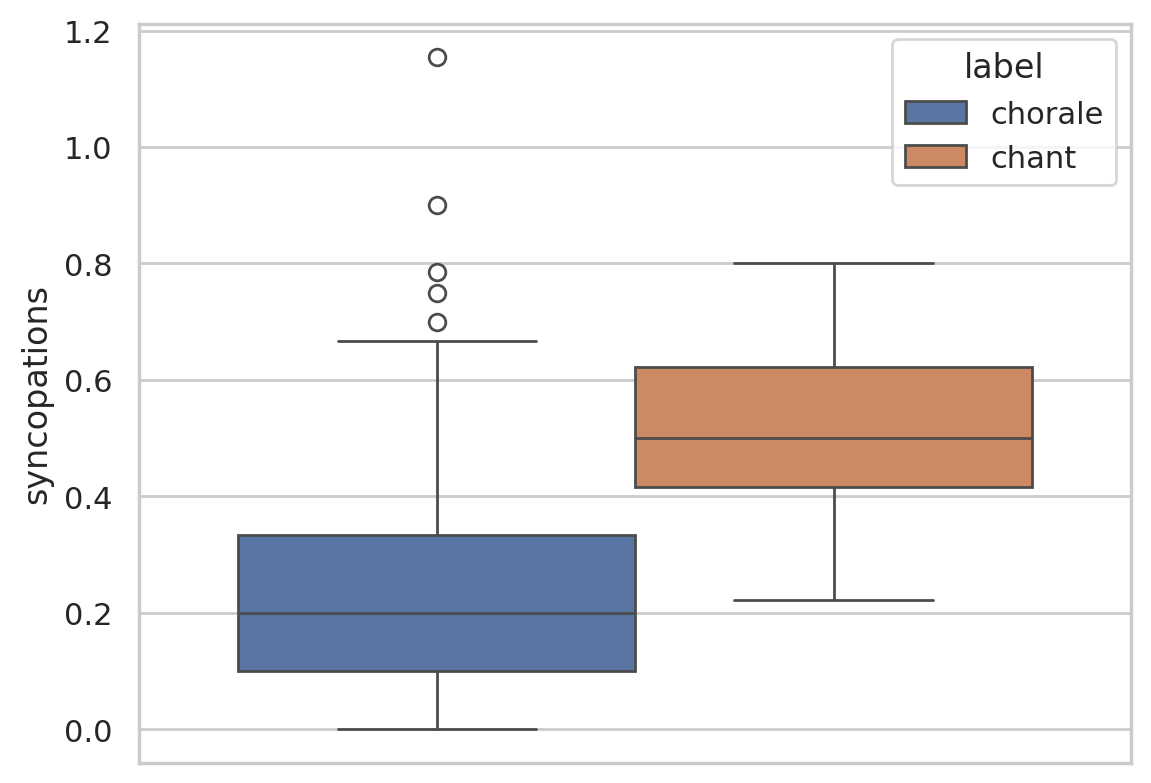

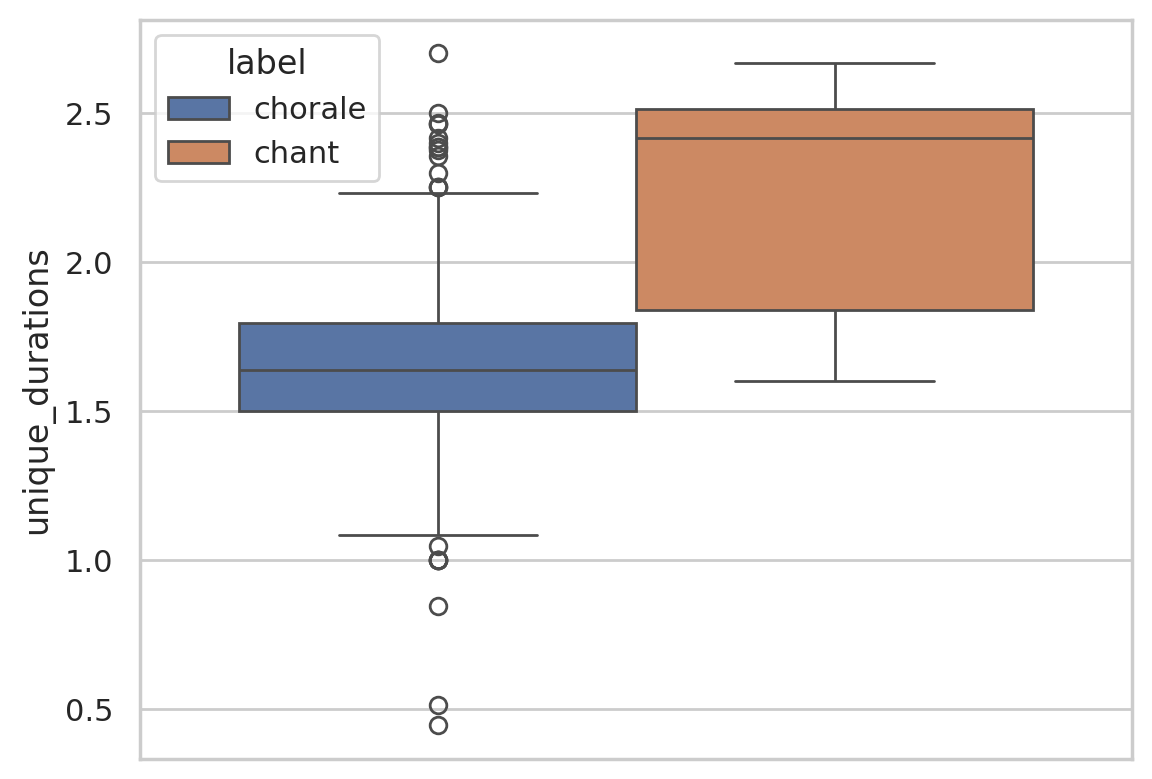

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.boxplot(data=results_df, y="mean_interval", hue="label")
plt.show()

sns.boxplot(data=results_df, y="notes_per_bar", hue="label")
plt.show()

sns.boxplot(data=results_df, y="unique_notes_per_bar", hue="label")
plt.show()

sns.boxplot(data=results_df, y="accidentals", hue="label")
plt.show()

sns.boxplot(data=results_df, y="syncopations", hue="label")
plt.show()

sns.boxplot(data=results_df, y="unique_durations", hue="label")
plt.show()